# Classification

Classification is the process of predicting a categorical response. Methods used for classification often predict the probability of each of the categories of a qualitative variable as the basis for making the classification. 

With classification, we can answer questions like:
- A person has a set of symptoms that could be attributed to one of three medical conditions. Which one?
- Is a transaction fraudulent or not?

*difference between Classification and Regression models??* Classification models deal with categorical problems. Continuous problems can be turned into a classification problem.

## Creating Classification Variables

*You are given the BMI of sample of people along with other data like their diet, exercise routine, and demographic factors. BMI is a continuous variable, but how could we structure our data to be a classification problem?*

*Binary Classification Problem* or
*multi class problems *

Eg: bottles of wine and assessing their quality... can look at bad, avg and good instead... the question is how do you set your threshold. one way is to look at a scientific study. or look at some other related variable and seeing relation. or look at the distribution of the day. or sometimes people will look at the mean or median. It all depends on the business context which will guide you in thinking about how to break the classification groups

## Classification Algorithms


In this section of the course we will go over many additional machine learning algorithms.  Some of them are specific to classification problems (k-nearest neighbors, naive bayes classifier), while others can be used with both classification and regression problems (decision tree, support vector machine, etc.).  


    - K-Nearest Neighbors
    - Logistic Regression
    - Ensemble Methods (Random Forest and XGBoost)
    - Support Vector Machine

## Evaluation 

There are multiple ways to evlauate a classification model when deciding how it generalizes to unseen data. The most straightforward way is the accuracy score - how many of your predicitons were correct. This score can be misleading though. Imagine a dataset where 90% of the obersvations belong to one class. Well you can get 90% accuracy by just always predicting the dominant class. There are additional scores that evlauate more specificall when you are right or wrong.  

**Classification Evlauation Metrics:**
    
    - Accuracy
    - Precision
    - Recall 
    - F1 Score
    - AUC Score
    - there are a number of other classification evaluation metrics that you can use but these five will be discussed here

## Additional Considerations

- **Class imbalance:** How do you handle when one class dominates your observations. i.e. testing for a disease
- **Multiclass problems:** Some models are only made to predict binary categories and you have to do additional steps when predicting between 3 or more groups. 
- **Multilabel problems:** How do you handle it if the observation can belong to multiple groups. i.e. movie genres

___

# Implementing a K-Nearest Neighbors Model

## Objective: 
- To be able to implement a KNN classification model, and utilize a visualization to identify the best value of K.

## Agenda

- What is the **K-nearest neighbors** classification model?
- Tuning the Parameters of a KNN model.
*How do you use the sklearn grid search function? (will look at later)*


## K-nearest neighbors (KNN) classification

- A simple model that classifies a new data point by looking at the data points 'nearest' to the new data point.
- KNN is an non parametric lazy learning algorithm.

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

No coefficients to deal with
Let's look at the training data and look at the relationship ......... (look at lecture vid)

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?


<img src='images/Knn_step_1.webp' width=500/>
The question mark is an observation to classify as Class A or Class B

Suppose P1 is the point, for which label needs to predict. 

First, you need to decide your size of $K$. $K$ is the number of nearest neighbors you want to tak into account when deciding how to classify the new data point.

Next, you need to find the $K$ nearest points. You find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. 

Then you classify new points by 'majority vote' of its $K$ neighbors.  Each object votes for their class and the class with the most votes is taken as the prediction. 





<img src='images/KNN_final.webp' width=500/>

KNN has the following basic steps:

1. Determine number of neighbors
2. Calculate distance
3. Find closest neighbors
4. Vote for labels

### Example training data

This example uses a multi-class problem and each color represents teh decision boundaries for each class. 

Think of the lines between the classes as a decision boundaries................... (lecture video)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

The decision boundaries are not as clear in this chart, so that is why ou have the light colored regions

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](images/euclidean-distance.png)

### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](images/vectorgraph.jpg)

### Euclidean Distance Equation
![alt text](images/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

### Voting

How to break ties:

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors
    
*Probabilities are not precise so not very accurate and is highly dependent on various parameters like the number of neighbors you pick......    *
*Non parametric so no pvalues, means, std dev... etc... looking mainly at does it belong to one class or the other*

## Implementing the KNN Classifier with SKlearn

## Reviewing the Titanic dataset

When doing EDA with classification data, you are able to do more complex visualizations because you can represent the target variable by coloring each data point. Below are examples are some EDA you might want to do for a classification problem. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


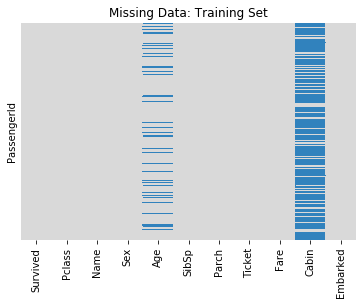

In [4]:
# Heatmap
sns.heatmap(titanic.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

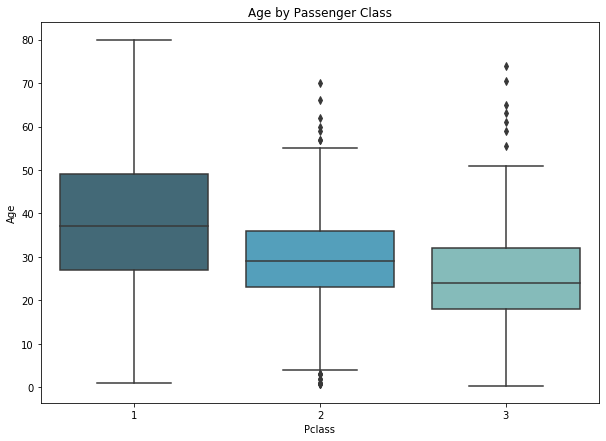

In [5]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [6]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            
            return 29

        else:
            return 24

    else:
        return Age
    
# Apply the function to the Age column
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age, axis =1 )    

In [7]:
# Remove Cabin feature
titanic.drop('Cabin', axis = 1, inplace = True)

In [8]:
# Remove rows with missing data
titanic.dropna(inplace = True)

In [9]:
# Data types
print(titanic.info())

# Identify non-null objects
print('\n')
print('Non-Null Objects to Be Converted to Category')
print(titanic.select_dtypes(['object']).columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB
None


Non-Null Objects to Be Converted to Category
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [10]:
# Remove unnecessary columns  
titanic.drop(['Name','Ticket'], axis = 1, inplace = True)

# Convert objects to category data type
objcat = ['Sex','Embarked']

for colname in objcat:
    titanic[colname] = titanic[colname].astype('category')

In [11]:
# Numeric summary
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,889.0,0.382452,0.486260,0.00,0.0000,0.0000,1.0,1.0000
Pclass,889.0,2.311586,0.834700,1.00,2.0000,3.0000,3.0,3.0000
Age,889.0,29.019314,13.209814,0.42,22.0000,26.0000,36.5,80.0000
SibSp,889.0,0.524184,1.103705,0.00,0.0000,0.0000,1.0,8.0000
Parch,889.0,0.382452,0.806761,0.00,0.0000,0.0000,0.0,6.0000
Fare,889.0,32.096681,49.697504,0.00,7.8958,14.4542,31.0,512.3292


Look at the distribution of the target variable.   This is really improtnat becasue it gives you an idea of how 'hard' it is to predict each class.  

Target Variable
Survived
0    549
1    340
Name: Survived, dtype: int64


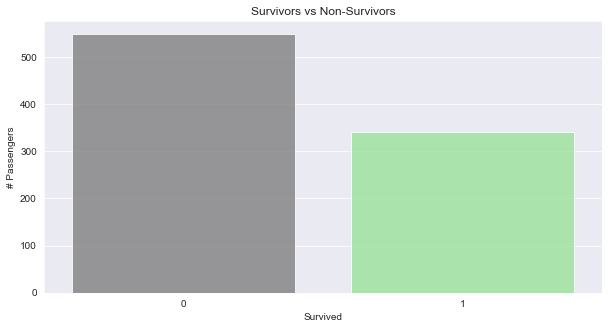

In [44]:
# Survival Count
print('Target Variable')
print(titanic.groupby(['Survived']).Survived.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(titanic['Survived'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()
#looking at the class balance or the distribution in the class 
#should give you an idea about how hard it might become to predict class

Looking at the distribution of different features. 

Continuous Variables
      count       mean        std   min      25%      50%   75%       max
Age   889.0  29.019314  13.209814  0.42  22.0000  26.0000  36.5   80.0000
Fare  889.0  32.096681  49.697504  0.00   7.8958  14.4542  31.0  512.3292
--------------------------------------------------------------------------------
Discrete Variables
Pclass
1    214
2    184
3    491
Name: Pclass, dtype: int64
SibSp
0    606
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64
Parch
0    676
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


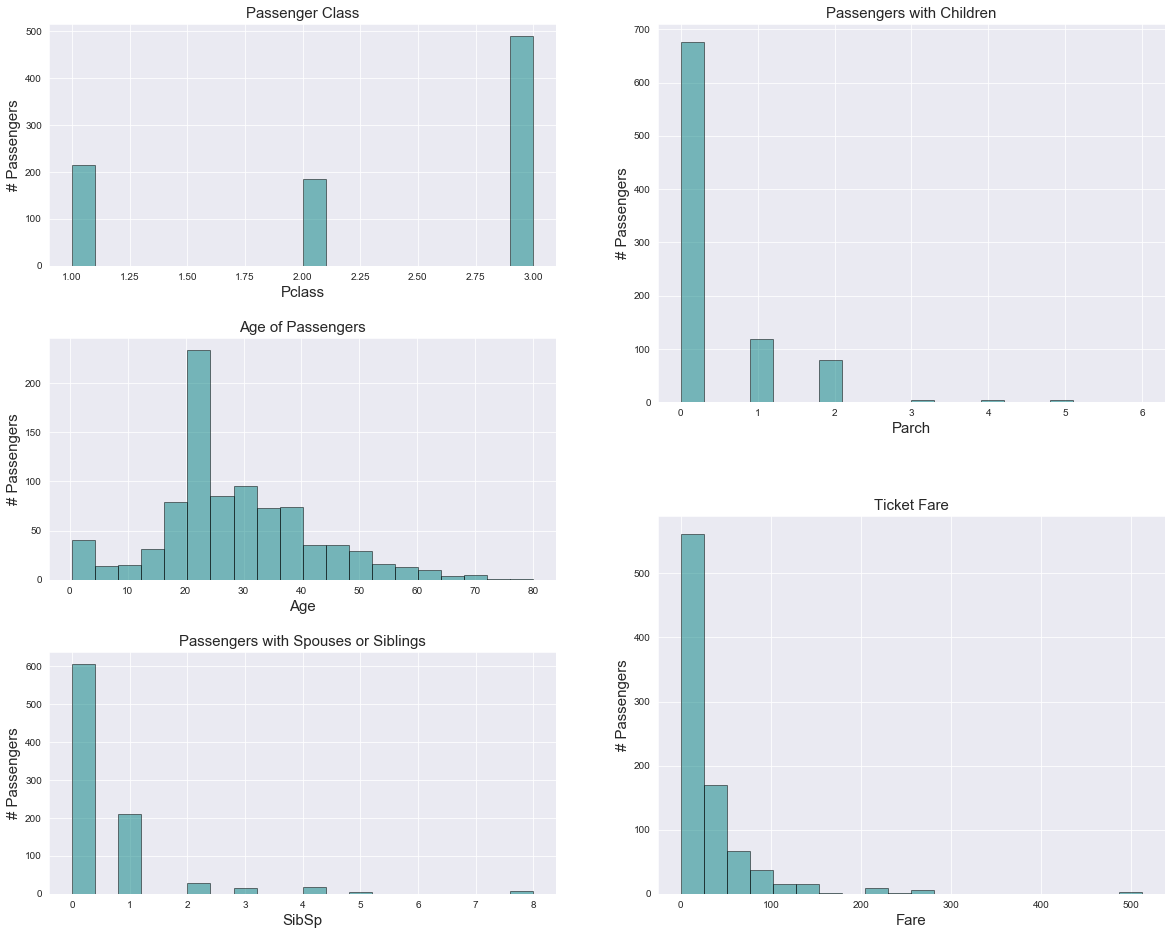

In [13]:
# Identify numeric features
print('Continuous Variables')
print(titanic[['Age','Fare']].describe().transpose())
print('--'*40)
print('Discrete Variables')
print(titanic.groupby('Pclass').Pclass.count())
print(titanic.groupby('SibSp').SibSp.count())
print(titanic.groupby('Parch').Parch.count())

# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(titanic['Pclass'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('Pclass', fontsize = 15)
ax1.set_ylabel('# Passengers',fontsize = 15)
ax1.set_title('Passenger Class',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(titanic['Age'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax2.set_xlabel('Age',fontsize = 15)
ax2.set_ylabel('# Passengers',fontsize = 15)
ax2.set_title('Age of Passengers',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(titanic['SibSp'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('SibSp',fontsize = 15)
ax3.set_ylabel('# Passengers',fontsize = 15)
ax3.set_title('Passengers with Spouses or Siblings',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(titanic['Parch'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Parch',fontsize = 15)
ax4.set_ylabel('# Passengers',fontsize = 15)
ax4.set_title('Passengers with Children',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(titanic['Fare'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Fare',fontsize = 15)
ax5.set_ylabel('# Passengers',fontsize = 15)
ax5.set_title('Ticket Fare',fontsize = 15)

plt.show()

Passenger Class Summary


Survived    0    1
Pclass            
1          80  134
2          97   87
3         372  119


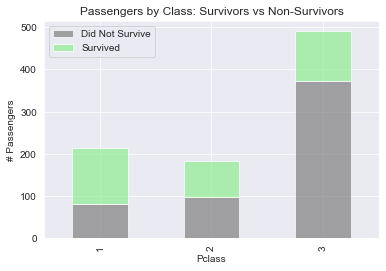

In [14]:

# Passenger class summary
print('Passenger Class Summary')

print('\n')
print(titanic.groupby(['Pclass','Survived']).Pclass.count().unstack())

# Passenger class visualization
pclass = titanic.groupby(['Pclass','Survived']).Pclass.count().unstack()
p1 = pclass.plot(kind = 'bar', stacked = True, 
                   title = 'Passengers by Class: Survivors vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70)
p1.set_xlabel('Pclass')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])
plt.show()

Passengers with Siblings or Spouse


Survived      0      1
SibSp                 
0         398.0  208.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN


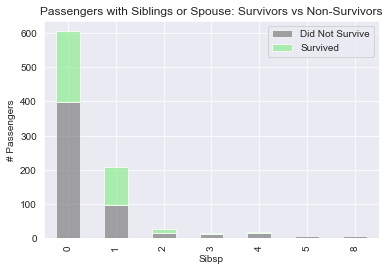

In [15]:
# SibSp Summary
print('Passengers with Siblings or Spouse')
print('\n')
print(titanic.groupby(['SibSp','Survived']).SibSp.count().unstack())

sibsp = titanic.groupby(['SibSp','Survived']).SibSp.count().unstack()
p2 = sibsp.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p2.set_title('Passengers with Siblings or Spouse: Survivors vs Non-Survivors')
p2.set_xlabel('Sibsp')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])
plt.show()

Survived      0      1
Parch                 
0         445.0  231.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN


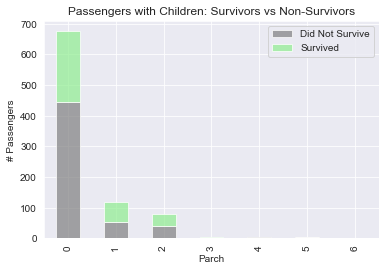

In [16]:
print(titanic.groupby(['Parch','Survived']).Parch.count().unstack())

parch = titanic.groupby(['Parch','Survived']).Parch.count().unstack()
p3 = parch.plot(kind = 'bar', stacked = True,
                   color = ['grey','lightgreen'], alpha = .70)
p3.set_title('Passengers with Children: Survivors vs Non-Survivors')
p3.set_xlabel('Parch')
p3.set_ylabel('# Passengers')
p3.legend(['Did Not Survive','Survived'])
plt.show()

Statistical Summary of Age and Fare


Did Not Survive
      count       mean        std  min      25%   50%   75%    max
Age   549.0  29.560109  12.778433  1.0  23.0000  25.0  37.0   74.0
Fare  549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0
--------------------------------------------------------------------------------
Survived
      count       mean        std   min       25%   50%      75%       max
Age   340.0  28.146088  13.852728  0.42  21.00000  27.0  36.0000   80.0000
Fare  340.0  48.209498  66.748773  0.00  12.44375  26.0  56.9469  512.3292


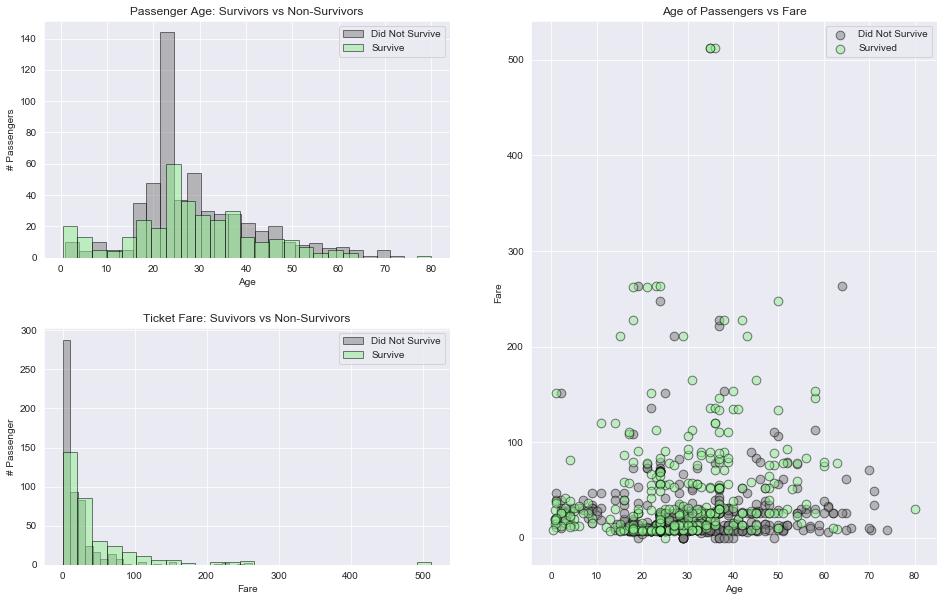

In [17]:
# titanic.hist(bins=10,figsize=(9,7),grid=False)
# Statistical summary of continuous variables 
print('Statistical Summary of Age and Fare')
print('\n')
print('Did Not Survive')
print(titanic[titanic['Survived']==0][['Age','Fare']].describe().transpose())
print('--'*40)
print('Survived')
print(titanic[titanic['Survived']==1][['Age','Fare']].describe().transpose())
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (16,10))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(221)
ax1.hist(titanic[titanic['Survived'] ==0].Age, bins = 25, label ='Did Not Survive', alpha = .50,edgecolor= 'black',color ='grey')
ax1.hist(titanic[titanic['Survived']==1].Age, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color = 'lightgreen')
ax1.set_title('Passenger Age: Survivors vs Non-Survivors')
ax1.set_xlabel('Age')
ax1.set_ylabel('# Passengers')
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(223)
ax2.hist(titanic[titanic['Survived']==0].Fare, bins = 25, label = 'Did Not Survive', alpha = .50, edgecolor ='black', color = 'grey')
ax2.hist(titanic[titanic['Survived']==1].Fare, bins = 25, label = 'Survive', alpha = .50, edgecolor = 'black',color ='lightgreen')
ax2.set_title('Ticket Fare: Suvivors vs Non-Survivors')
ax2.set_xlabel('Fare')
ax2.set_ylabel('# Passenger')
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(122)
ax3.scatter(x = titanic[titanic['Survived']==0].Age, y = titanic[titanic['Survived']==0].Fare,
                        alpha = .50,edgecolor= 'black',  c = 'grey', s= 75, label = 'Did Not Survive')
ax3.scatter(x = titanic[titanic['Survived']==1].Age, y = titanic[titanic['Survived']==1].Fare,
                        alpha = .50,edgecolors= 'black',  c = 'lightgreen', s= 75, label = 'Survived')
ax3.set_xlabel('Age')
ax3.set_ylabel('Fare')
ax3.set_title('Age of Passengers vs Fare')
ax3.legend()

plt.show()

In [18]:
# Identify categorical features
titanic.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

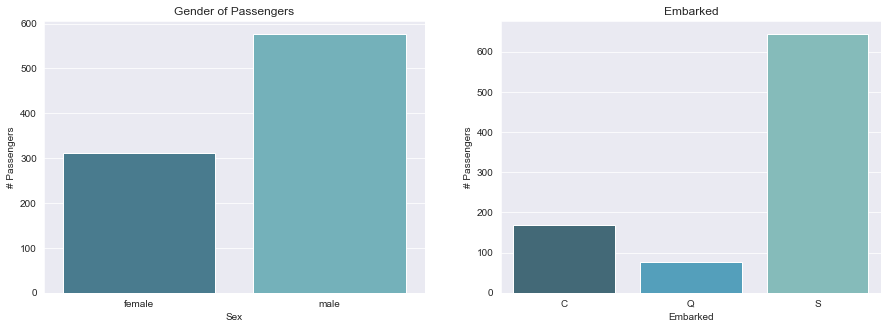

In [19]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,5))

# Plot [0]
sns.countplot(x = 'Sex', data = titanic, palette = 'GnBu_d', ax = axes[0])
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('# Passengers')
axes[0].set_title('Gender of Passengers')

# Plot [1]
sns.countplot(x = 'Embarked', data = titanic, palette = 'GnBu_d',ax = axes[1])
axes[1].set_xlabel('Embarked')
axes[1].set_ylabel('# Passengers')
axes[1].set_title('Embarked')

plt.show()

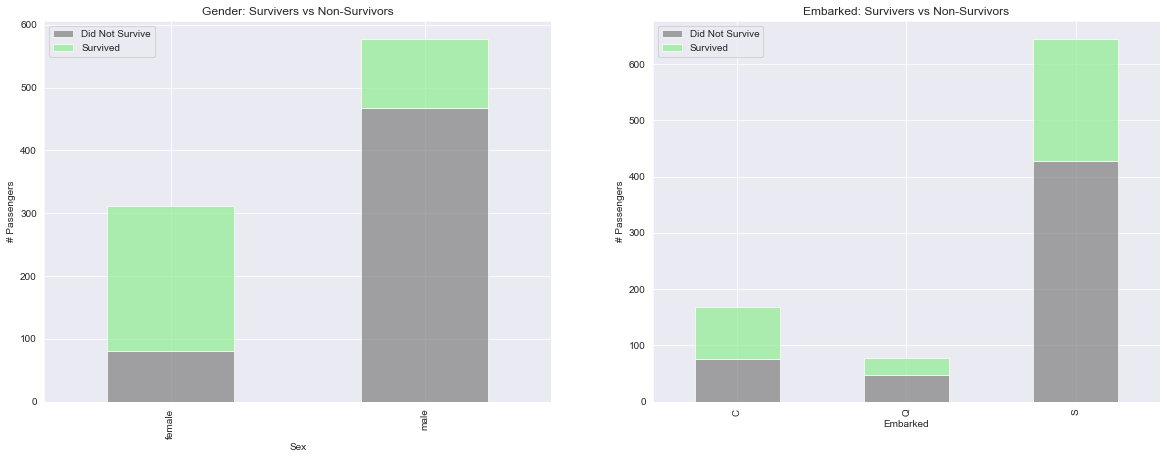

In [20]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (20,7))

gender = titanic.groupby(['Sex','Survived']).Sex.count().unstack()
p1 = gender.plot(kind = 'bar', stacked = True, 
                   title = 'Gender: Survivers vs Non-Survivors', 
                   color = ['grey','lightgreen'], alpha = .70, ax = axes[0])
p1.set_xlabel('Sex')
p1.set_ylabel('# Passengers')
p1.legend(['Did Not Survive','Survived'])


embarked = titanic.groupby(['Embarked','Survived']).Embarked.count().unstack()
p2 = embarked.plot(kind = 'bar', stacked = True, 
                    title = 'Embarked: Survivers vs Non-Survivors', 
                    color = ['grey','lightgreen'], alpha = .70, ax = axes[1])
p2.set_xlabel('Embarked')
p2.set_ylabel('# Passengers')
p2.legend(['Did Not Survive','Survived'])

plt.show()

## Prepping the data

Instead of goign through all of those data cleaning steps, I am importing a pre-cleaned dataset to analyze. 

In [21]:

titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

In [22]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,False,1,0,1
2,1,1,38.0,1,0,71.2833,False,0,0,0
3,1,3,26.0,0,0,7.9250,False,0,0,1
4,1,1,35.0,1,0,53.1000,False,0,0,1
5,0,3,35.0,0,0,8.0500,False,1,0,1


One thing that is new is I created a binary variable to classify passengars less than 10 years old.  I now need to convert that boolean into an integer

In [23]:
titanic['youngin'] = titanic['youngin'].astype('int')

In [24]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'youngin',
       'male', 'Q', 'S'],
      dtype='object')

In [25]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.069741,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.254854,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [26]:
# Split data to be used in the models
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# X = titanic[['Age', 'male', 'Q', 'S' ]]

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

In [27]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(889, 9)
(889,)


In [28]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled

The feature with more variance is going to be important to deciding the class identification of the observation.... to compare the variance, always scale your data for comparability.

<img src='images/nonnormal.png' width=500/>

<img src='images/normalized.png' width=500/>

#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## Modeling your Data 

scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [30]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [45]:
#creating an instance of this class
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [46]:
knn?

In [32]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [47]:
knn.fit(X_train, y_train)
#this fit does not really do anything here...

KNeighborsClassifier(n_neighbors=1)

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [34]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [35]:
y_pred_class

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0])

## Evaluating your model

We will talk about different evaluation metrics this in a later lecture. For now we can use accuracy as a way to evaluate the model. How many predictions of your class is were correct?

In [48]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

#we need to get an idea of our class distribution to understand how much better our model did

Accuracy:0.8385650224215246


**Is this a good accuracy score?**

We will talk later about how to evaluate models, but one way to give context to this accuracy score is to to compare this score to the score you would get just predicting the majority class.  

In [37]:
titanic.Survived.mean()

0.38245219347581555

Remember the majority class can be either the positive class or negative class

In [38]:
max(titanic.Survived.mean(), (1-titanic.Survived.mean()))

0.6175478065241844

*for a simple baseline model our accuracy would be 62%... which would in essence be looking at the dominant class*

___


## Tuning your model

By using a differen number of neighbors (K) to classify each instance you can get different predictions and different model accuracy.  So K is a hyperparameter of the dodel that you can tune to try and prevent overfitting.
___

In [39]:
# instantiate the model (using a different value fopr K)
knn7 = KNeighborsClassifier(n_neighbors=7)


# fit the model with data
knn7.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn7.predict(X_test)

In [49]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
# accuracy went up for K = 7
# K is a hyperparameter in this model that we are tuning

Accuracy:0.8385650224215246


#### Search for an optimal value of K for KNN


In [41]:
#fumction to find the position of the maximum value in a list
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [50]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = metrics.accuracy_score(y_test, y_pred)
    
    k_scores.append(acc)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores)
    
print(idx+1, val)
print(k_scores)

9 0.852017937219731
[0.8071748878923767, 0.8340807174887892, 0.820627802690583, 0.8295964125560538, 0.8295964125560538, 0.8340807174887892, 0.8385650224215246, 0.8430493273542601, 0.852017937219731, 0.852017937219731, 0.8475336322869955, 0.8295964125560538, 0.8116591928251121, 0.8295964125560538, 0.820627802690583, 0.8295964125560538, 0.8251121076233184, 0.8161434977578476, 0.820627802690583, 0.8161434977578476]


#### Visual comparison of different $K$s

This is not an ROC curve

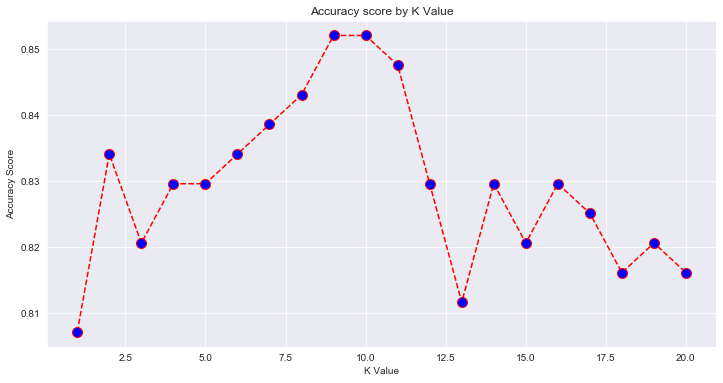

In [52]:
import matplotlib.pyplot as plt  
#plotting the curve by k
plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

# Other hyperparameters we can tune are the distance, the weight

### What value of K performs best on our Test data?

### How do you think K size relates to our concepts of bias and variance?

___

![alt text](images/K-NN_Neighborhood_Size_print.png)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)